# Cost Function

Example: IMDB 



In [1]:
## Imports 
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

mpl.style.use('bmh')

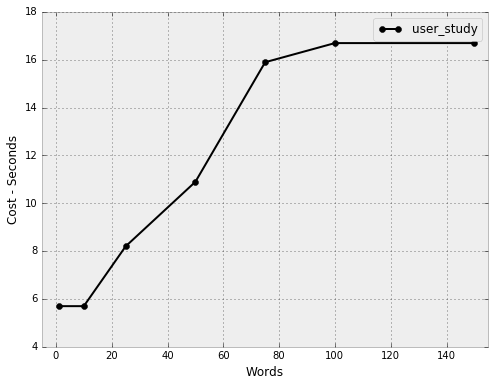

In [6]:
def user_study(x):
    imdb = {10:5.7, 25:8.2, 50:10.9,75:15.9,100:16.7}
    return [imdb[v] if v in imdb.keys() else max(imdb.values()) if v > max(imdb.keys()) else min(imdb.values()) for v in x]
#     return [1] * len(x)

def plot_cost(fns, x=None, labels=None, **kwargs):
    r = {10:5.7, 25:8.2, 50:10.9,75:15.9,100:16.7}
    fig = plt.figure(figsize=(8,6))
    if x is None:
        x = sorted(r.keys())
        x = [1] + x + [150]#,200]
    first = True
    if labels is None:
        fn_labels=[fn.__name__ for fn in fns]
    else:
        fn_labels=labels
    for fn,lbl in zip(fns, fn_labels):
        if first:
            plt.plot(x, fn(x, **kwargs),'ko-', label=lbl)
            first=False
        else:
            plt.plot(x, fn(x, **kwargs),'o-', label=lbl)
    plt.legend(loc='best')
    plt.xlabel('Words')
    plt.ylabel('Cost - Seconds')
    plt.xlim([-5,155])

plot_cost([user_study])


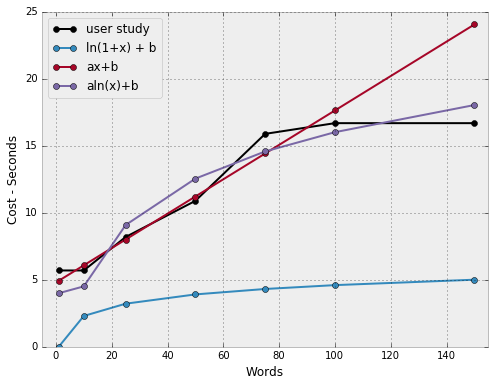

In [22]:
def log_cost(x, slope=1., intercept=0.):
    return slope*np.log(np.array(x))+intercept

def log_cost_2(x):
    y = np.log(np.array(x))*5-7
    y[y<=0] = 4
    return y

def log_base(x, base=2):
    return np.log10(x) / np.log10(base)

from scipy import stats
imdb = {10:5.7, 25:8.2, 50:10.9,75:15.9,100:16.7}


def linear_cost(x):
    slope, intercept,_,_,_ = stats.linregress(sorted(imdb.keys()),sorted(imdb.values()))
    return slope*np.array(x) + intercept

plot_cost([user_study, log_cost, linear_cost, log_cost_2], 
          labels=['user study', 'ln(1+x) + b','ax+b', 'aln(x)+b'])

def savefig(name):
    plt.savefig("../graphs/"+name + ".pdf", bbox_inches="tight", dpi=200, transparent=True)

savefig("cost_functions1")

In [18]:
def plot_cost_v2(fns, x=None, labels=None, list_args=None):
    r = {10:5.7, 25:8.2, 50:10.9,75:15.9,100:16.7}
    fig = plt.figure(figsize=(8,6))
    if x is None:
        x = sorted(r.keys())
        x = [1] + x + [150]#,200]
    if labels is None:
        fn_labels=[fn.__name__ for fn in fns]
    else:
        fn_labels=labels
    for fn,lbl,kwargs in zip(fns, fn_labels, list_args):
            plt.plot(x, fn(x, **kwargs),'o-', label=lbl)
    plt.legend(loc='best')
    plt.xlabel('Words')
    plt.ylabel('Cost - Seconds')
    plt.xlim([-5,155])



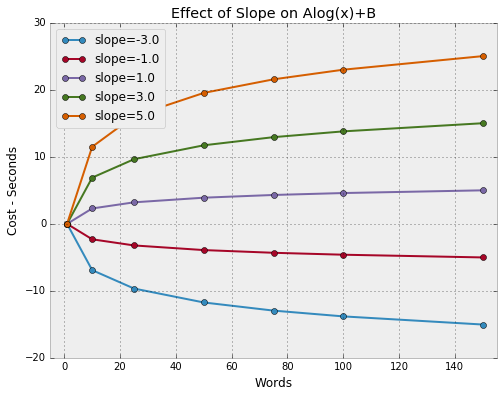

In [29]:
plot_cost_v2([log_cost]*5, labels=["slope={}".format(i) for i in np.arange(-3.,10.,2)[:5]], 
             list_args=[{'slope':s, 'intercept':i} for s,i in zip(np.arange(-3.,10.,2)[:5], [0]*5)])
plt.title("Effect of Slope on Alog(x)+B")
savefig("slope_only")


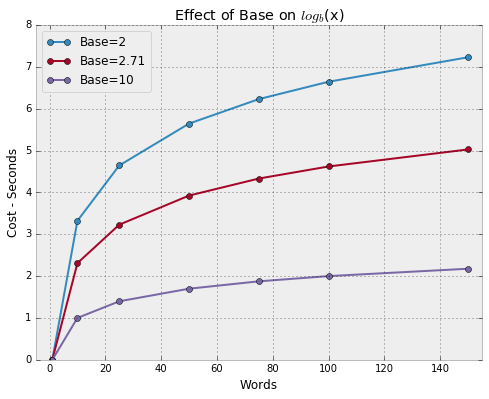

In [48]:
bases = [2, 2.71,10]
plot_cost_v2([log_base]*5, labels=["Base={}".format(i) for i in bases], 
             list_args=[{'base':b} for b in bases])
plt.title("Effect of Base on $log_{b}$(x)")
savefig("base_only")



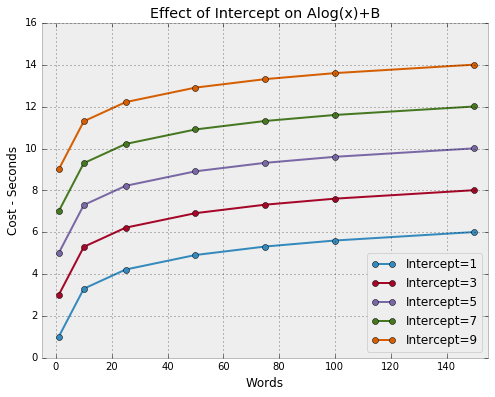

In [50]:
plot_cost_v2([log_cost]*5, labels=["Intercept={}".format(i) for i in range(1,10,2)], 
             list_args=[{'slope':s, 'intercept':i} for s,i in zip([1]*5,np.arange(1.,10.,2)[:5])])
plt.title("Effect of Intercept on Alog(x)+B")
savefig("intercept_only")



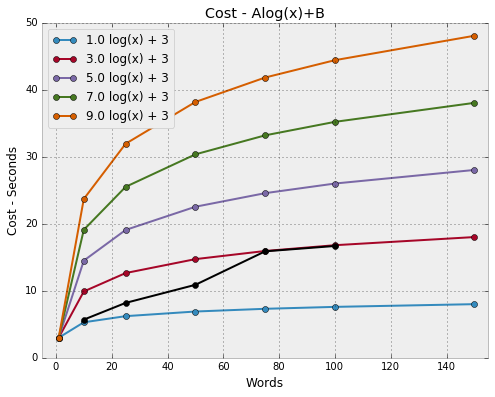

In [82]:
# Assuming 5 seconds is the minimum for one word

slopes = np.arange(1,10.,2)[:5]
plot_cost_v2([log_cost]*5, labels=["{} log(x) + 3".format(i) for i in slopes], 
             list_args=[{'slope':s, 'intercept':i} for s,i in zip(slopes,[3]*5)])
plt.plot([10,25,50,75,100],user_study([10,25,50,75,100]),'ko-',label='user study')
plt.title("Cost - Alog(x)+B")
savefig("cost_function")




In [64]:

from sklearn import cross_validation
from sklearn import datasets
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
iris = datasets.load_iris()
print iris.data.shape, iris.target.shape
scores = cross_validation.cross_val_score(clf, iris.data, iris.target,cv=3)
print scores

(150, 4) (150,)
[ 0.96078431  0.92156863  0.95833333]


In [67]:
from sklearn.metrics import make_scorer
def _prediction_score(y, y_pred):
    return np.mean([y_pred[i][j] for i,j in enumerate(y)])


def score_prediction(y, y_pred):
    return make_score_function_proba(_prediction_score)


def make_score_function_proba(fn):
    return make_scorer(fn, greater_is_better=True,needs_proba=True)

preds = make_score_function_proba(_prediction_score)
scores = cross_validation.cross_val_score(clf, iris.data, iris.target,cv=3, scoring=preds)
print scores

[ 0.73038777  0.71842981  0.7193989 ]


In [78]:
from sklearn.cross_validation import StratifiedKFold
def cv_probability(clf, data, target, n_folds=10, scoring='accuracy'):
    skf = StratifiedKFold(target, n_folds=n_folds)
    scores = []
    for train_index, test_index in skf:
        X_train, X_test = data[train_index], data[test_index]
        y_train, y_test = target[train_index], target[test_index]
        clf.fit(X_train, y_train)
        predictions = clf.predict_proba(X_test)
        scores.extend([predictions[i][j] for i,j in enumerate(y_test)])
    return np.mean(scores)
cv_probability(clf, iris.data, iris.target, scoring=preds)


0.73929504649251532